In [5]:
#!pip3 install tensorflow

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
from sklearn.metrics import accuracy_score
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import random

In [2]:
data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.array(data_dict['data'])
labels = np.array(data_dict['labels'])

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7680, 42)
(1920, 42)
(7680,)
(1920,)


In [4]:
model = Sequential([
    Dense(128, input_dim=42, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])


c:\Users\Jatin\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,320 (59.84 KB)

 Trainable params: 15,320 (59.84 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.2)


Epoch 1/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0433 - loss: 3.2025 - val_accuracy: 0.1400 - val_loss: 3.1008
Epoch 2/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0902 - loss: 3.0660 - val_accuracy: 0.2279 - val_loss: 2.7526
Epoch 3/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1591 - loss: 2.7414 - val_accuracy: 0.3451 - val_loss: 2.1828
Epoch 4/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2376 - loss: 2.3304 - val_accuracy: 0.4935 - val_loss: 1.8323
Epoch 5/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2858 - loss: 2.0693 - val_accuracy: 0.5566 - val_loss: 1.6036
Epoch 6/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3325 - loss: 1.8781 - val_accuracy: 0.6126 - val_loss: 1.4464
Epoch 7/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3814 - loss: 1.7180 - val_accuracy: 0.6673 - val_loss: 1.2909
Epoch 8/200
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3994 - loss: 1.6392 - val_accu

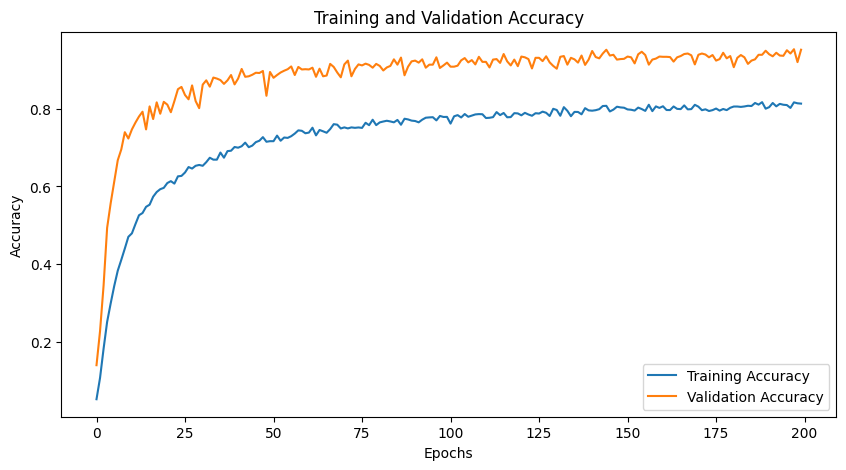

In [9]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
label_dict = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'K',
    10: 'L',
    11: 'M',
    12: 'N',
    13: 'O',
    14: 'P',
    15: 'Q',
    16: 'R',
    17: 'S',
    18: 'T',
    19: 'U',
    20: 'V',
    21: 'W',
    22: 'X',
    23: 'Y'
}

file = open('cnn_model.p','wb')
pickle.dump({'model':model, 'label_dict':label_dict},file)
file.close()

# ASL to English

In [12]:
inputs = pickle.load(open('./cnn_model.p','rb'))

model = inputs['model']
label_dict = inputs['label_dict']

def calculate_bounding_box(x_arr, y_arr, W, H, margin=20):
    if not x_arr or not y_arr:
        return 0, 0, 0, 0

    x1 = int(min(x_arr) * W) - margin
    y1 = int(min(y_arr) * H) - margin
    x2 = int(max(x_arr) * W) + margin
    y2 = int(max(y_arr) * H) + margin

    x1 = max(x1, 0)
    y1 = max(y1, 0)
    x2 = min(x2, W)
    y2 = min(y2, H)

    return x1, y1, x2, y2

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.2,
)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()


while True:
    ret, frame = cap.read()
    if not ret:
        break
    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            data_aux = []
            x_arr = []
            y_arr = []

            # mp_drawing.draw_landmarks(
            #     frame,
            #     hand_landmarks,
            #     mp_hands.HAND_CONNECTIONS,
            #     mp_drawing_styles.get_default_hand_landmarks_style(),
            #     mp_drawing_styles.get_default_hand_connections_style()
            # )
            
            for landmark in hand_landmarks.landmark:
                x, y = landmark.x, landmark.y
                data_aux.extend([x, y])
                x_arr.append(x)
                y_arr.append(y)

            if len(data_aux) == 42:
                data_aux = np.array([data_aux], dtype=np.float32)

                x1, y1, x2, y2 = calculate_bounding_box(x_arr, y_arr, W, H)
                pred = model.predict(data_aux)
                char = label_dict[np.argmax(pred)]
                
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
                cv2.putText(frame, char, (x1, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

# English to ASL

In [21]:
inputs = pickle.load(open('./cnn_model.p','rb'))

model = inputs['model']
label_dict = inputs['label_dict']

def calculate_bounding_box(x_arr, y_arr, W, H, margin=20):
    if not x_arr or not y_arr:
        return 0, 0, 0, 0 

    x1 = int(min(x_arr) * W) - margin
    y1 = int(min(y_arr) * H) - margin
    x2 = int(max(x_arr) * W) + margin
    y2 = int(max(y_arr) * H) + margin

    x1 = max(x1, 0)
    y1 = max(y1, 0)
    x2 = min(x2, W)
    y2 = min(y2, H)

    return x1, y1, x2, y2

def get_random_char():
    random_char = random.choice(list(label_dict.values()))
    random_char_index = list(label_dict.values()).index(random_char)
    
    return random_char, random_char_index

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.2,
)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()

random_char, random_char_index = get_random_char()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            data_aux = []
            x_arr = []
            y_arr = []

            # mp_drawing.draw_landmarks(
            #     frame,
            #     hand_landmarks,
            #     mp_hands.HAND_CONNECTIONS,
            #     mp_drawing_styles.get_default_hand_landmarks_style(),
            #     mp_drawing_styles.get_default_hand_connections_style()
            # )
            
            for landmark in hand_landmarks.landmark:
                x, y = landmark.x, landmark.y
                data_aux.extend([x, y])
                x_arr.append(x)
                y_arr.append(y)

            if len(data_aux) == 42: 
                data_aux = np.array([data_aux], dtype=np.float32)

                x1, y1, x2, y2 = calculate_bounding_box(x_arr, y_arr, W, H)
                pred = model.predict(data_aux)
                probability = pred[0][random_char_index]
                
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
                cv2.putText(frame, f'{probability:.2%}', (x1, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)

    cv2.putText(frame, f'Try the sign for: {random_char}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break
    elif key & 0xFF == ord('n'):
        random_char, random_char_index = get_random_char()

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━